In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

# initial parameters
epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (96,96,3)

data = []
labels = []

# load image files from the dataset
image_files = [f for f in glob.glob(r'PATH_to_image_data' + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

# converting images to arrays and labelling the categories
for img in image_files:

    image = cv2.imread(img)
    
    image = cv2.resize(image, (img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-2] # C:\Files\gender_dataset_face\woman\face_1162.jpg
    if label == "woman":
        label = 1
    else:
        label = 0
        
    labels.append([label]) # [[1], [0], [0], ...]

# pre-processing
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# split dataset for training and validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)

trainY = to_categorical(trainY, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
testY = to_categorical(testY, num_classes=2)

# augmenting datset 
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

# define model
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    
    # The axis that should be normalized, after a Conv2D layer with data_format="channels_first", 
    # set axis=1 in BatchNormalization.

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (2,2), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (2,2), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (2,2), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (2,2), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model

# build model
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)

# compile the model
opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the model
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
28/28 [==============================] - 62s 2s/step - loss: 0.7769 - accuracy: 0.7271 - val_loss: 0.7551 - val_accuracy: 0.4978
Epoch 2/100
28/28 [==============================] - 62s 2s/step - loss: 0.4632 - accuracy: 0.8175 - val_loss: 0.6621 - val_accuracy: 0.6688
Epoch 3/100
28/28 [==============================] - 60s 2s/step - loss: 0.4164 - accuracy: 0.8366 - val_loss: 0.8830 - val_accuracy: 0.5022
Epoch 4/100
28/28 [==============================] - 66s 2s/step - loss: 0.3336 - accuracy: 0.8776 - val_loss: 0.6399 - val_accuracy: 0.6797
Epoch 5/100
28/28 [==============================] - 69s 2s/step - loss: 0.3076 - accuracy: 0.8905 - val_loss: 0.7075 - val_accuracy: 0.5043
Epoch 6/100
28/28 [==============================] - 70s 2s/step - loss: 0.2765 - accuracy: 0.8984 - val_loss: 0.8473 - val_accuracy: 0.5108
Epoch 7/100
28/28 [==============================] - 65s 2s/step - loss: 0.301

Epoch 57/100
28/28 [==============================] - 86s 3s/step - loss: 0.0583 - accuracy: 0.9816 - val_loss: 0.0937 - val_accuracy: 0.9697
Epoch 58/100
28/28 [==============================] - 69s 2s/step - loss: 0.0686 - accuracy: 0.9753 - val_loss: 0.0672 - val_accuracy: 0.9762
Epoch 59/100
28/28 [==============================] - 84s 3s/step - loss: 0.0574 - accuracy: 0.9792 - val_loss: 0.0739 - val_accuracy: 0.9784
Epoch 60/100
28/28 [==============================] - 83s 3s/step - loss: 0.0701 - accuracy: 0.9708 - val_loss: 0.1155 - val_accuracy: 0.9589
Epoch 61/100
28/28 [==============================] - 81s 3s/step - loss: 0.0719 - accuracy: 0.9719 - val_loss: 0.1379 - val_accuracy: 0.9545
Epoch 62/100
28/28 [==============================] - 83s 3s/step - loss: 0.0508 - accuracy: 0.9820 - val_loss: 0.4099 - val_accuracy: 0.8831
Epoch 63/100
28/28 [==============================] - 67s 2s/step - loss: 0.0520 - accuracy: 0.9798 - val_loss: 0.1696 - val_accuracy: 0.9481
Epoch 

In [43]:
model.save('gender_detection.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: gender_detection.model\assets


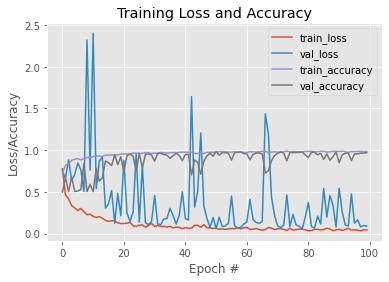

In [45]:
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_accuracy")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")


In [46]:
plt.savefig('plot.png')

<Figure size 432x288 with 0 Axes>